In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

## Getting data ready for analysis 
## (Data Preprocessing stage)
### Concatinating multiple month-wise based datasets into single dataframe )

In [3]:
files = os.listdir("./uber-pickups-in-new-york-city")[-7:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [4]:
files.remove('uber-raw-data-janjune-15.csv')

In [5]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [6]:
os.listdir(".")

['.ipynb_checkpoints',
 '.jovianrc',
 'PC_Uber_trip_analysis.ipynb',
 'uber-pickups-in-new-york-city',
 'uber_trip_deploy.ipynb']

In [7]:
final_df = pd.DataFrame()
for file in files:
    df = pd.read_csv("./uber-pickups-in-new-york-city/"+file)
    final_df = pd.concat([df,final_df])

In [8]:
final_df

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [9]:
final_df.shape

(4534327, 4)

In [10]:
final_df.ndim

2

In [11]:
final_df.size

18137308

In [12]:
df = final_df.copy()

In [13]:
df

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [14]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [15]:
df.loc[:,"Date/Time"] = pd.to_datetime(df["Date/Time"],format="%m/%d/%Y %H:%M:%S")

In [16]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [17]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [18]:
df["weekday"] = df["Date/Time"].dt.day_name()
df["day"] = df["Date/Time"].dt.day

In [19]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1


In [20]:
df["month"] = df["Date/Time"].dt.month
df["hour"] = df["Date/Time"].dt.hour

In [21]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,9,0


## Analysis of Uber trip

### Analysis of journey by week-days

In [22]:
import plotly.express as px

In [23]:
df["weekday"].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

In [29]:
px.bar(x=df["weekday"].value_counts().index,y=df["weekday"].value_counts(),title="Rush per weekdays")


### Analysis of journey by hours

In [31]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,9,0


<AxesSubplot:title={'center':'Rush by hours'}, ylabel='Frequency'>

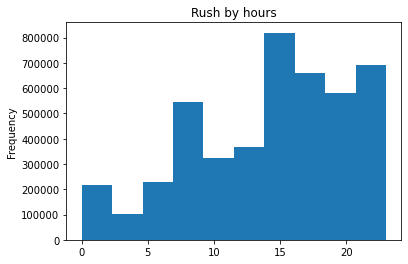

In [39]:
df["hour"].plot(kind="hist",title='Rush by hours') # Pandas built-in plot method
# Rush is more in the evening hours

#### It peaks during evening time when people are logging off from work

### Analyis of journey  hours by months

In [43]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,9,0


In [47]:
df["month"].unique()

array([9, 5, 6, 7, 8, 4], dtype=int64)

In [123]:
month_list = ["September","May","June","July","August","April"]

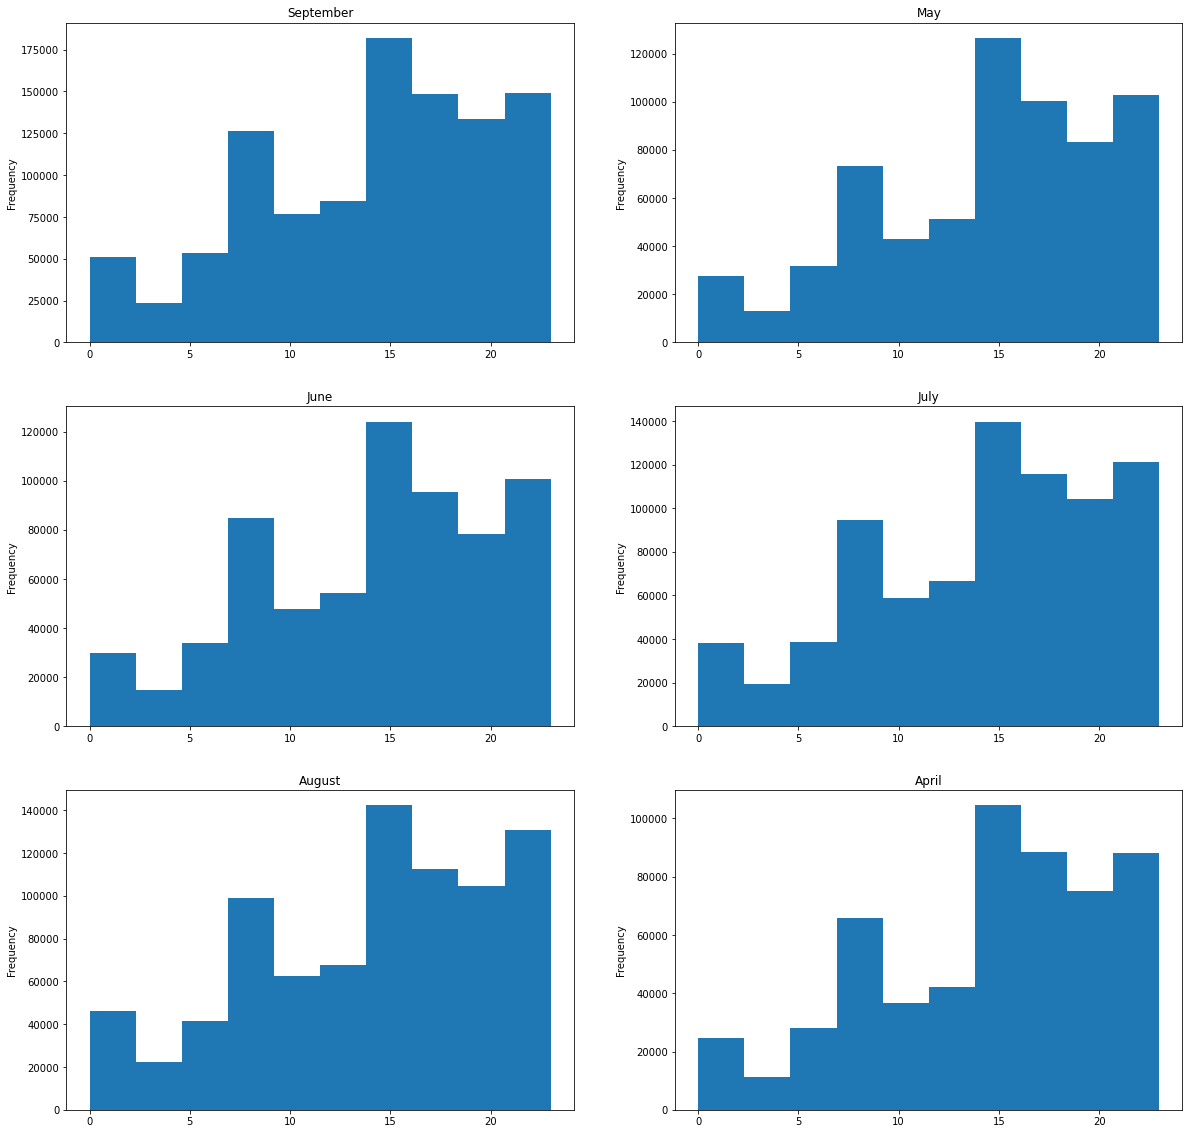

In [126]:
plt.figure(figsize=(20,20))
for i,month in enumerate(df["month"].unique()):
    plt.subplot(3,2,i+1)
    df[df["month"]==month]["hour"].plot(kind="hist",title=month_list[i]) # hours by each months

### Analysis of each month having maximum rides

In [127]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,9,0


In [132]:
df["month"].value_counts()

9    1028136
8     829275
7     796121
6     663844
5     652435
4     564516
Name: month, dtype: int64

In [135]:
month_list

['September', 'May', 'June', 'July', 'August', 'April']

In [131]:
px.bar(x=month_list,y=df["month"].value_counts(),title="Max rides per months")

### Analysis of journey of day

In [133]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,9,0


In [141]:
df["day"].value_counts().index

Index(['Thursday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday', 'Monday',
       'Sunday'],
      dtype='object')

In [150]:
px.bar(x=df["day"].value_counts().index,y=df["day"].value_counts(),
       title="Max rides per days ",labels={"x":"Days in month","y":"Rides"})